
<h1 style="padding:10px;background-color:#0e2a45;opacity: 0.8;margin:0;color:#eff0ea;font-family:Courier New;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:200">Importing Libraries</h1>

In [152]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


<h1 style="padding:10px;background-color:#0e2a45;opacity: 0.8;margin:0;color:#eff0ea;font-family:Courier New;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:200">Loading and Basic Data Exploration</h1>

In [5]:
# Reading data file
df = pd.read_csv(r'C:\Users\mohid\Downloads\dataset.csv')
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [10]:
# Checking for data shape (rows, columns)
df.shape

(114000, 21)

* The dataset contain 114000 rows and 21 columns

In [13]:
# Showing the all Data columns name
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [14]:
# Checking for data tpyes for all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

* The datatypes of column seems correct according to values in columns but we'll take a closer look at each one. and will see if we can reduce the size of the memory like there is so much column with float we will analyse if we can convert it into int datatype so This could help minimize the size of the data but we need to be careful not to lose any important information.
*  Additionally, the key, mode, and time_signature columns should be categorical, but they are currently stored as integers. We'll change their data types to categories

In [7]:
# Checking for duplicates
df.duplicated().sum()

0

* No duplicates values in our data

In [8]:
# # Checking for NULL values
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

* there are 3 columns with null values , each one have only 1 null value, will handle this in "preprocessing" section


<h1 style="padding:10px;background-color:#0e2a45;opacity: 0.8;margin:0;color:#eff0ea;font-family:Courie
    r New;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:200">Deep dive into Exploratary Data Analysis(EDA) & Visualization</h1>

In [11]:
# Statistical measures of the dataset
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


# CATEGORICAL COLUMNS :

### Column: Artist

In [21]:
# No's of unique artist
df['artists'].nunique()

31437

* There are total 31437 Unique artists in dataset

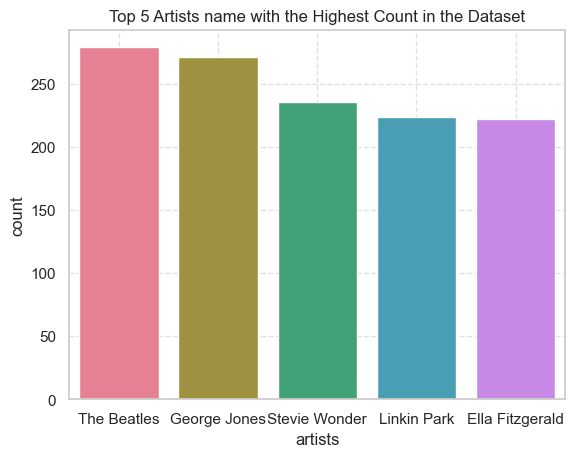

In [80]:
# plotting the top 5 artist wiht most counts
sns.set(style="whitegrid")
sns.barplot((df['artists'].value_counts()[:5]), palette="husl")
plt.title('Top 5 Artists name with the Highest Count in the Dataset')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Column: Album name

In [81]:
df['album_name'].unique()

array(['Comedy', 'Ghost (Acoustic)', 'To Begin Again', ...,
       '#20 Sueños Vividos - Música Intrumental Suave 2018 para Dormir Bien y Relajarse Profundamente',
       'Frecuencias Álmicas en 432hz (Solo Piano)', 'Revelation Songs'],
      dtype=object)

In [82]:
df['album_name'].nunique()

46589

-  There are total 46589 Unique Album name in dataset

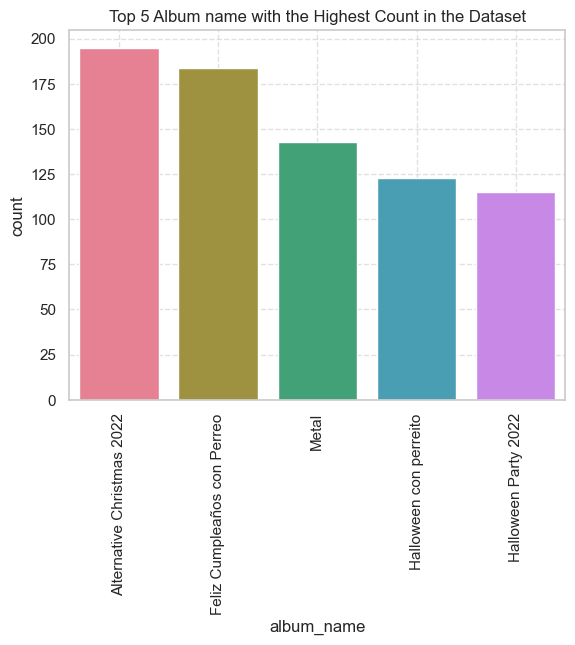

In [87]:
# plotting the top 5 Album wiht most counts
sns.set(style="whitegrid")
sns.barplot((df['album_name'].value_counts()[:5]), palette="husl")
plt.title('Top 5 Album name with the Highest Count in the Dataset')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation = 90)
plt.show()

### Column: track_name

In [85]:
df['track_name'].unique()

array(['Comedy', 'Ghost - Acoustic', 'To Begin Again', ...,
       'Water Into Light', 'Miss Perfumado', 'Barbincor'], dtype=object)

In [86]:
df['track_name'].nunique()

73608

* There are total 73608 Unique Track name in dataset

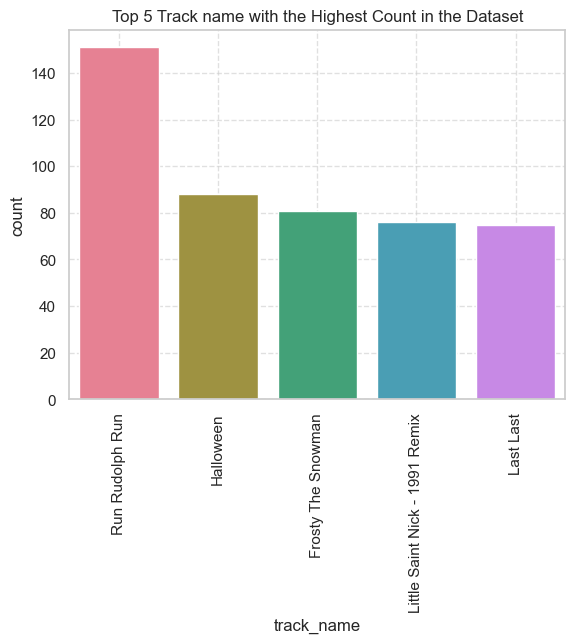

In [89]:
# plotting the top 5 Track wiht most counts
sns.set(style="whitegrid")
sns.barplot((df['track_name'].value_counts()[:5]), palette="husl")
plt.title('Top 5 Track name with the Highest Count in the Dataset')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation = 90)
plt.show()

### Column: track_genre

In [90]:
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [91]:
df['track_genre'].nunique()

114

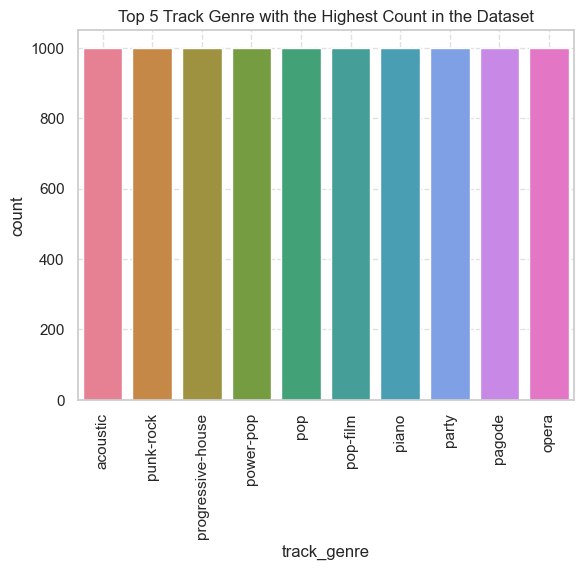

In [96]:
# plotting the top 10 Track Genre wiht most counts
sns.set(style="whitegrid")
sns.barplot((df['track_genre'].value_counts()[:10]), palette="husl")
plt.title('Top 5 Track Genre with the Highest Count in the Dataset')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation = 90)
plt.show()

* Track Genre seems balance with 1000 value

### Column: explicit

In [104]:
df['explicit'].unique()

array([False,  True])

* There are 2 unique category in Explicit column

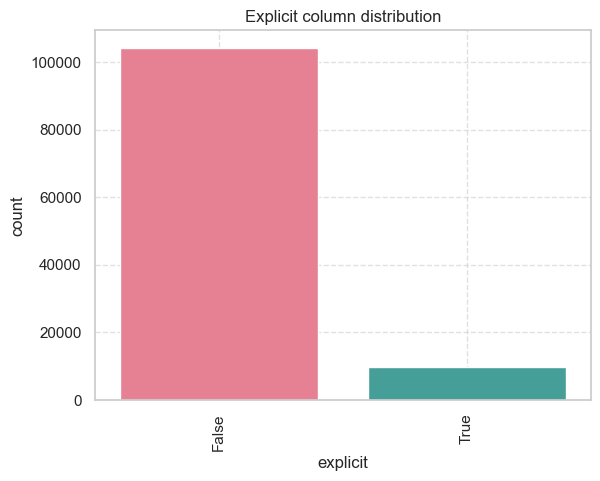

In [106]:
# plotting the Explicit column distribution
sns.set(style="whitegrid")
sns.barplot((df['explicit'].value_counts()[:10]), palette="husl")
plt.title('Explicit column distribution')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation = 90)
plt.show()

### Column: key

In [107]:
df['key'].unique()

array([ 1,  0,  2,  6, 11,  8,  4,  7,  3, 10,  5,  9], dtype=int64)

In [125]:
df['key'].nunique()

12

* There are 12 unique category in Key column

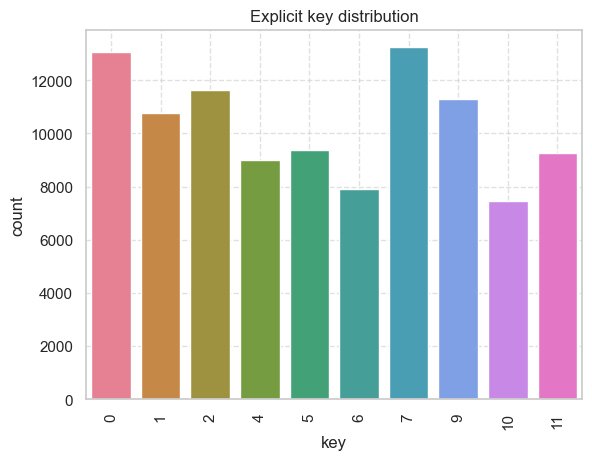

In [108]:
# plotting the key column distribution
sns.set(style="whitegrid")
sns.barplot((df['key'].value_counts()[:10]), palette="husl")
plt.title('Explicit key distribution')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation = 90)
plt.show()

### Column: mode

In [124]:
df['mode'].unique()

array([0, 1], dtype=int64)

* There are 2 unique category in time Mode column

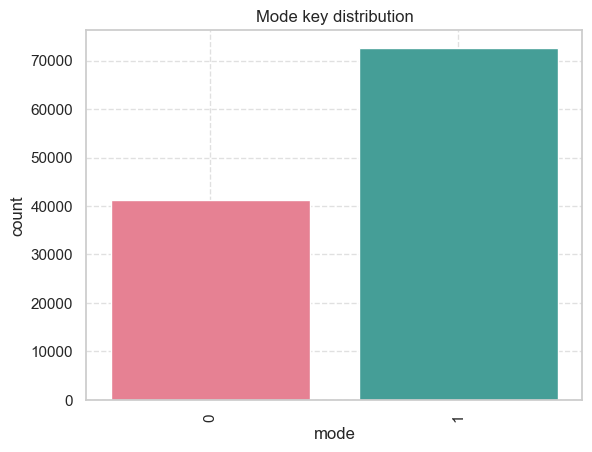

In [109]:
# plotting the mode column distribution
sns.set(style="whitegrid")
sns.barplot((df['mode'].value_counts()[:10]), palette="husl")
plt.title('Mode key distribution')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation = 90)
plt.show()

### Column: time_signature

In [112]:
df['time_signature'].unique()

array([4, 3, 1, 5, 0], dtype=int64)

* There are 5 unique category in time signature column

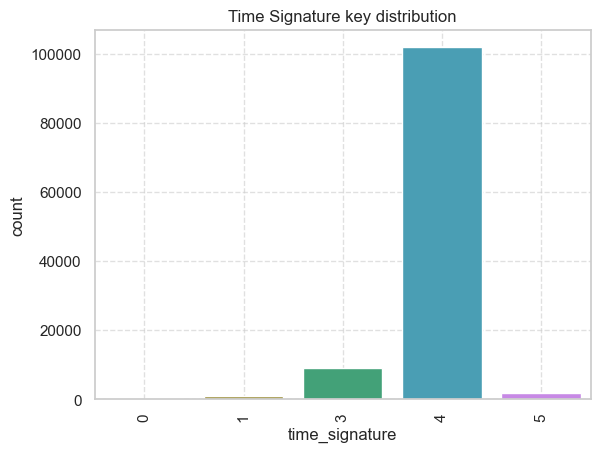

In [113]:
# plotting the time_signature column distribution
sns.set(style="whitegrid")
sns.barplot((df['time_signature'].value_counts()[:10]), palette="husl")
plt.title('Time Signature key distribution')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation = 90)
plt.show()

<br>

# NUMERICAL COLUMNS :

In [121]:
# Making function to plot numerical data will use BOX plot to see the distribution of the data
def plot_boxplot(column_name): 
    sns.boxplot(df[column_name], palette="Set3")  
    plt.title(f'Box Plot of {column_name}', fontsize=16, fontweight='bold') 
    plt.xlabel(column_name, fontsize=14)  
    plt.grid(True, linestyle='--', alpha=0.6)  
    plt.show() 

### Column: Popularity

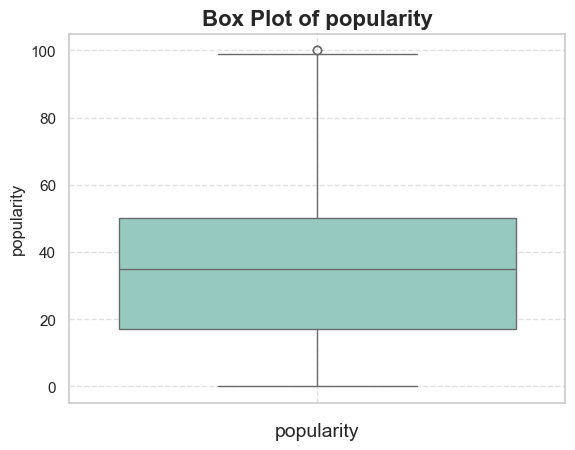

In [123]:
plot_boxplot('popularity')

* The BOX plot shows no outliers in Popularity column

### Column: duration_ms

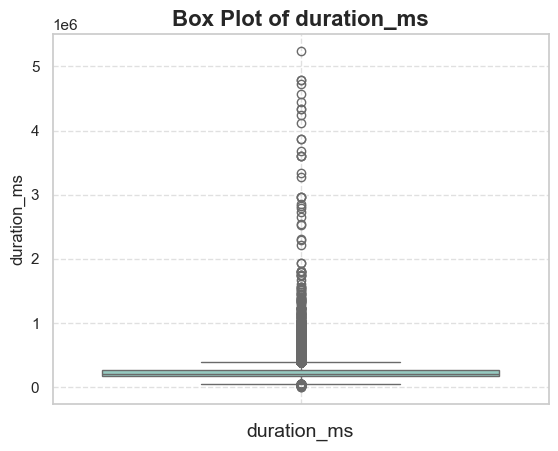

In [126]:
plot_boxplot('duration_ms')

* The BOX plot shows so many outliers also the data distribution is also not normalized

### Column: danceability

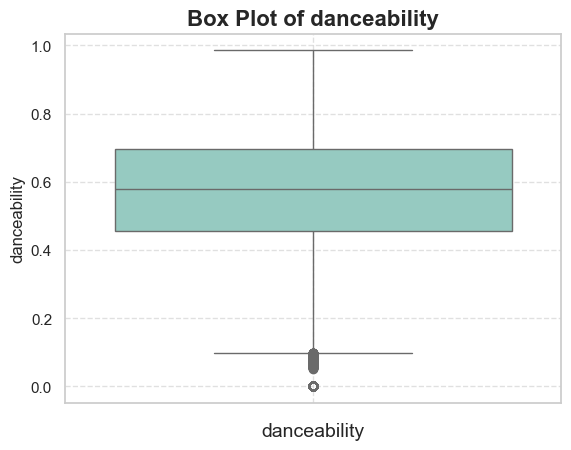

In [127]:
plot_boxplot('danceability')

### Column: energy

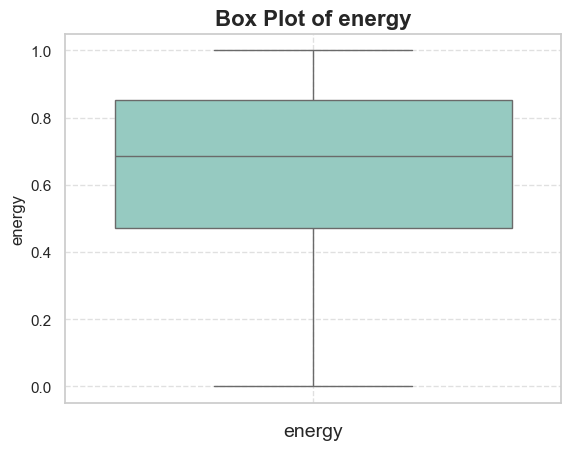

In [128]:
plot_boxplot('energy')

### Column: loudness

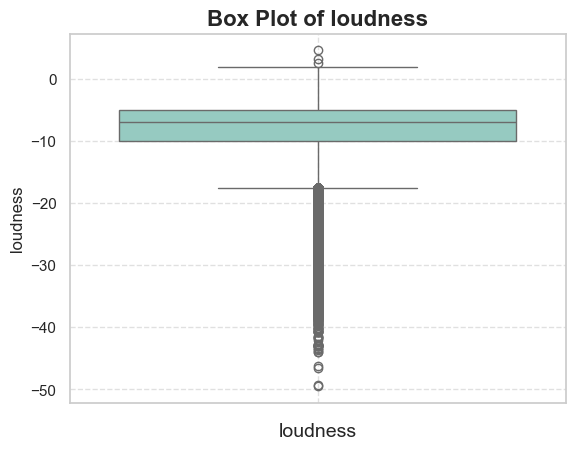

In [129]:
plot_boxplot('loudness')

### Column: speechiness

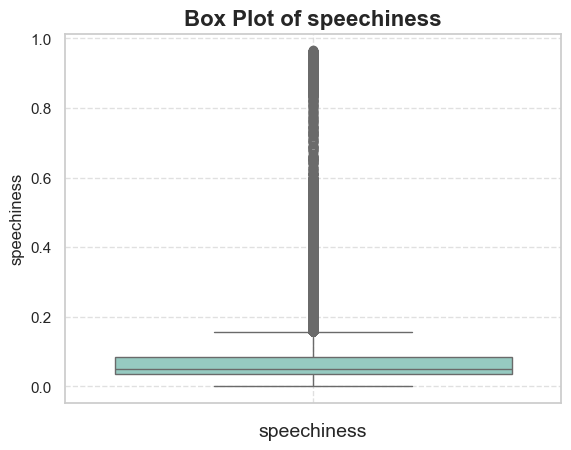

In [130]:
plot_boxplot('speechiness')

### Column: acousticness

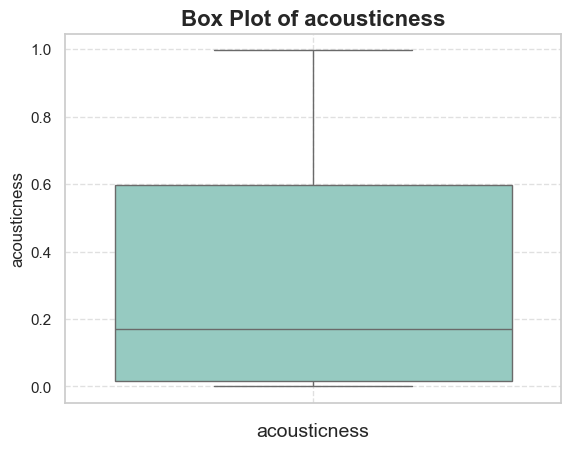

In [131]:
plot_boxplot('acousticness')

### Column: instrumentalness

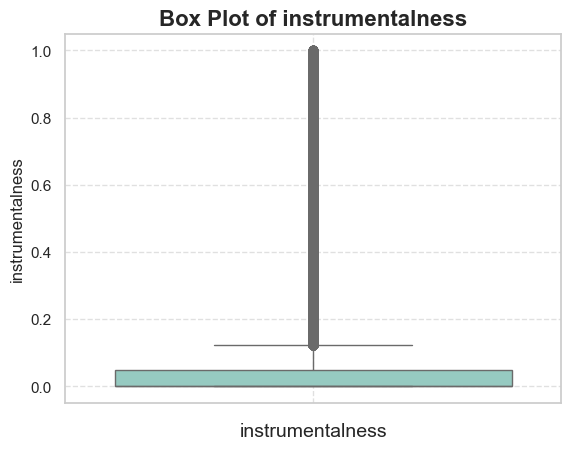

In [132]:
plot_boxplot('instrumentalness')

### Column: liveness

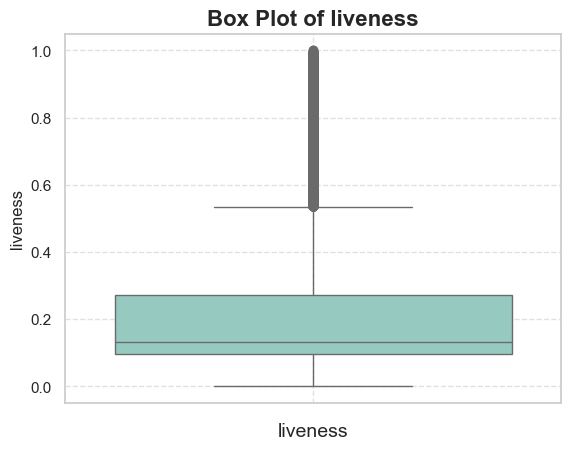

In [133]:
plot_boxplot('liveness')

### Column: valence

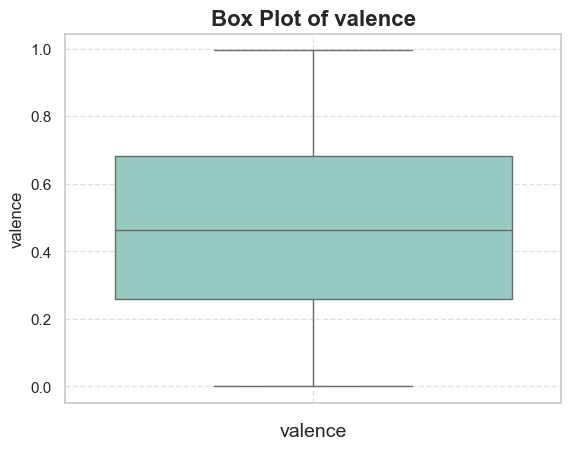

In [136]:
plot_boxplot('valence')

### Column: tempo	

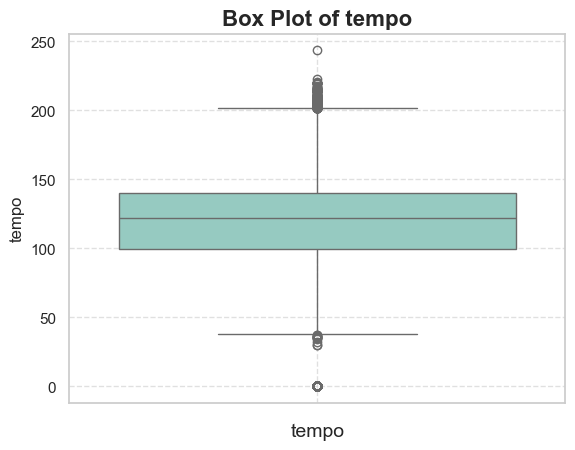

In [137]:
plot_boxplot('tempo')

### Summary insights after analysing Numerical Columns:
* Several columns contain a significant number of outliers, as observed in the boxplots.
* The data appears to be unnormalized, with some distributions showing left skewness and others right skewness. Normalization is required to standardize the data.

<br>


<h1 style="padding:10px;background-color:#0e2a45;opacity: 0.8;margin:0;color:#eff0ea;font-family:Courie
    r New;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:200">Data Preprocessing</h1>

what we gonna do in this secttion?
here it's steps:
 - Droping unnecessary columns
 - Handling missing vlaues
 - Will correct the right data type of column(key, mode, and time_signature)
 - handling outliers
 - Data Normalization or Scaling
 - Data Encoding

### Droping unnecessary columsn

In [154]:
df.head(1)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,-1.83514,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,1.625731,0.273928,False,0.603813,-0.871281,1,0.091981,0,2.814257,-0.880098,-0.31815,1.75102,0.787549,-1.204716,4,acoustic


In [156]:
df.drop(columns=['Unnamed: 0', 'track_id'], inplace=True)

### Handling with missing Values

In [138]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

* We have 3 columns with one missing value each. Since these columns are categorical and we don't know how important the data is, I'll replace the missing values with "unknown"

In [139]:
df['artists'].fillna('Unknown', inplace=True)
df['album_name'].fillna('Unknown', inplace=True)
df['track_name'].fillna('Unknown', inplace=True)

In [140]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

### Correcting datatpye

In [159]:
df['explicit'] = df['explicit'].astype('category')          
df['key'] = df['key'].astype('category')
df['mode'] = df['mode'].astype('category')
df['time_signature'] = df['time_signature'].astype('category')

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Unnamed: 0        114000 non-null  int64   
 1   track_id          114000 non-null  object  
 2   artists           114000 non-null  object  
 3   album_name        114000 non-null  object  
 4   track_name        114000 non-null  object  
 5   popularity        114000 non-null  int64   
 6   duration_ms       114000 non-null  int64   
 7   explicit          114000 non-null  bool    
 8   danceability      114000 non-null  float64 
 9   energy            114000 non-null  float64 
 10  key               114000 non-null  category
 11  loudness          114000 non-null  float64 
 12  mode              114000 non-null  category
 13  speechiness       114000 non-null  float64 
 14  acousticness      114000 non-null  float64 
 15  instrumentalness  114000 non-null  float64 
 16  li

### Handling with outliers

* HAndling with outliers using IQR method, in which for each numerical column, calculating the IQR to find outliers. Removing the data points outside 1.5 times the IQR from the quartiles.

In [145]:
def handle_outliers(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

In [146]:
df = handle_outliers(df)

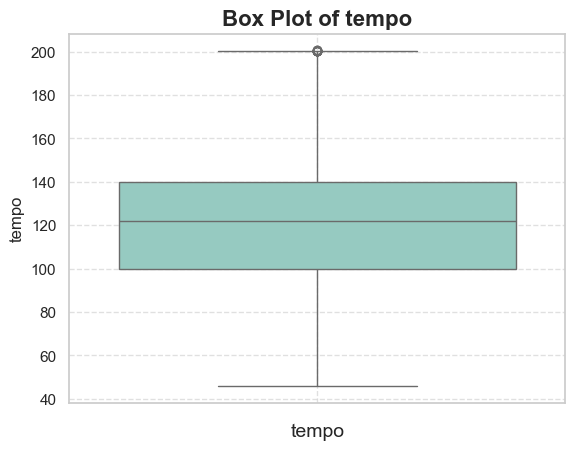

In [151]:
# Results after removing outliers
plot_boxplot('tempo')

### Data Scaling 

* Scaling the data using Standard Scaling Technique, which makes std = 1, and mean = 0 

In [153]:
def scale_data_standard(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    return df

df_scaled= scale_data_standard(df)

### Encoding Categorical Data

* Using One Hot Encoding technique to encode, why? because OHE One-hot is ideal for nominal data because it creates separate binary columns for each unique category.

In [160]:
def encode_categorical(df):
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    return df_encoded

In [ ]:
df_encoded = encode_categorical(df_scaled)

In [ ]:
# You can export the data by uncommenting below code

# df_encoded.to_csv('preprocessed_df.csv', index=False)

This is the Final Data after preprocessing, we can use this dataset to build the model, split the data and train the model 